D17125070 Taif Al Beedh, D17124269 Sahil Sahil, C17378303 Mariana Pirtac

# Image Processing Group Project: Change Counter  

- Read the image 
- Convert the image to grayscale 
- Smooth the image
- Use the HoughCircles function to find the circles in the image
- If the circles were found 
    - For each circle 
         - Draw a circle
         - For each element in the euro structure 
             - Isolate each coin
             - Convert the coins to RGB
             - Calculate the average of the coin's color
             - Calculate the change using the coin's color 
             - If the average of the color is found in the coin structure 
                 - Increase the final change
             - If the radius is found in the coin structure 
                 - Increase the final change
- Else 
    - Print an error message
- Print the number of coins in an image 

- If both final changes (using color and using radius ) are equal
    - Print final change
    
- Else
    - Print final change(using color)
    
- Display the image 
    

The total number of coins in the image = 6
According to both the radius and the color the total change = 3.85 euro


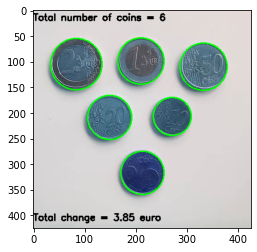

In [1]:
# Importing the libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image 
import easygui

# Euro coin structure
euro = {
    "2 Euro":
    {
        "min_radius": 49,
        "max_radius": 53,
        "value" : 2,
        "n" : 0, 
        "color" : 87.19,
        
    },
    
    "1 Euro":
    {
        "min_radius": 44,
        "max_radius": 45,
        "value" : 1,
        "n" : 0, 
        "color" : 91.25,
    },
    "50 Cents":
    {
        "min_radius": 45,
        "max_radius": 47,
        "value" : 0.50,
        "n" : 0,
        "color" : 106.07,
    },
    "20 Cents":
    {
        "min_radius": 42,
        "max_radius": 43,
        "value" : 0.20,
        "n" : 0, 
        "color" : 108.12,
    },
    "10 Cents":
    {
        "radius": 38,
        "min_radius": 36,
        "max_radius": 40,
        "value" : 0.10,
        "n" : 0, 
        "color" : 87.44,
    },
    "5 Cents":
    {
        "min_radius": 41,
        "max_radius": 42,
        "value" : 0.05,
        "n" : 0, 
        "color" : 86.71,
    }
    
}

# Reading the image 
coins = cv2.imread('Change.jpg')
#coins = cv2.resize(coins, (500,500))

# Creating a copy of the image 
coins_copy = coins.copy()

# Converting the image to grayscale
gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)

# Blur the image in order to reduce the noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Find the coins using the HoughCircles function
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1.3, 100)


total_change  = 0
result = 0

#Check if there are any circles/coins found
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    #circles = np.uint16(np.around(circles))
    
    # Find the radius and the x and y coordinate of each circle/coin 
    for(x, y, r) in circles:
        cv2.circle(coins_copy, (x,y), r, (0, 255, 0), 2)
        #cv2.circle(coins_copy, (x,y), 2, (0, 255, 0), 3)
        #cv2.putText(coins_copy, "center %d" % r, (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0,0,255), 1)


        # Then we use the structure of the euro coins to compare the radius of the coins in the structure with the radius of each coin in the image 
        for e in euro:  
            # Isolate each coin by selecting the region of interest
            roi = coins[y - r: y + r, x - r: x + r]   
            # Getting the weight and height of the isolated coin 
            width, height = roi.shape[:2]
            # Converting the pixels to 0s
            mask = np.zeros((width, height, 3), roi.dtype)
            cv2.circle(mask, (int(width / 2), int(height / 2)), r, (255, 255, 255), -1)
            # Adding the mask to the region of interest to isolate the coins
            # If mask = 1 and roi = 1 then dst = 1 else if their values are different the dst is going to be 0 
            dst = cv2.bitwise_and(roi, mask)
            # Identifing the coin's color
            dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
            # Calculating the color average
            color_avg = cv2.mean(dst)
            # Rounding the color average to 2 decimal places 
            color_avg = round(color_avg[0],2)
            
            
            # Using the color to determine the coin values 
            euro_value = euro[e]["value"]
            if(color_avg == euro[e]["color"] ):
                # Calculating the total change 
                result = result + euro[e]["value"] 
                
                
            # Using the radius to determine the coin values 
            euro_value = euro[e]["value"]
            if(r > euro[e]["min_radius"] and r <= euro[e]["max_radius"]  ):
                # This helps us to track the number of coins of the same type amount 
                euro[e]["n"] += 1
                # Calculating the total change 
                total_change = total_change + euro[e]["value"] 
               #cv2.putText(coins_copy, str(euro_value), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255,0),2)

else:
    print("No coins are detected")

print("The total number of coins in the image = %i" % len(circles))
    
# If the total change found using the colour equals to the one found using the radius    
if (result == total_change):
    print("According to both the radius and the color the total change = %s euro"% str(result))
# Else it will display the total change found using the colour
else:
    print("According to the color of the coins the total change = %s euro"% str(result))

# Prints the total amount of coins in the image               
cv2.putText(coins_copy, 'Total number of coins = %i' % len(circles), (0, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
# Prints the total amount of change 
cv2.putText(coins_copy, 'Total change = %s euro' % str(result), (0, 410), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

#plt.imshow(np.hstack([coins, coins_copy]))
plt.imshow(coins_copy)
plt.show()  


